# 频率域滤波

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lowpass_filtering as lpf
import highpass_filtering as hpf

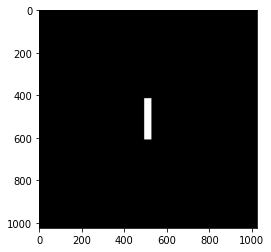

In [2]:
img = cv.imread('./image/Fig0424(a)(rectangle).tif', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

## 傅里叶谱

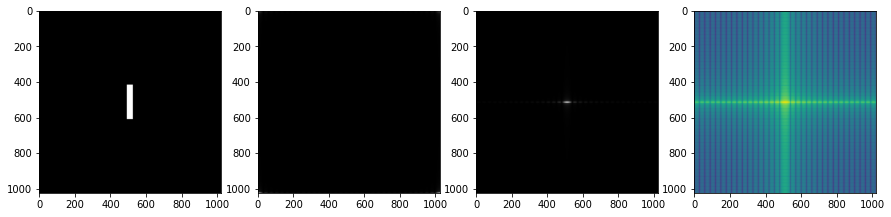

In [3]:
_, axe = plt.subplots(1, 4, figsize = (15, 8))

#原图片
img = np.asarray(img)
axe[0].imshow(img, cmap='gray')

#傅里叶频谱
img_fft = np.fft.fft2(img)
axe[1].imshow(np.abs(img_fft), cmap='gray')

#中心化后的频谱
img_temp = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_temp[i][j] = img[i][j] * np.power(-1, i + j)

img_temp_fft = np.fft.fft2(img_temp)
axe[2].imshow(np.abs(img_temp_fft), cmap='gray')

#对数变换后的结果
c = 1
axe[3].imshow(c * np.log(1 + np.abs(img_temp_fft)))

## 低通滤波器

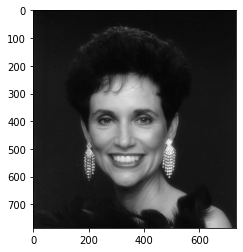

In [4]:
img = cv.imread('./image/Fig0450(a)(woman_original).tif', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')

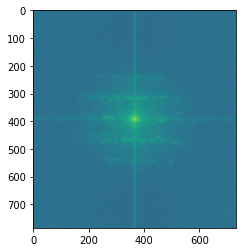

In [5]:
#傅里叶频谱
img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
plt.imshow(np.log(1 + np.abs(img_fft)))

### 高斯低通滤波器

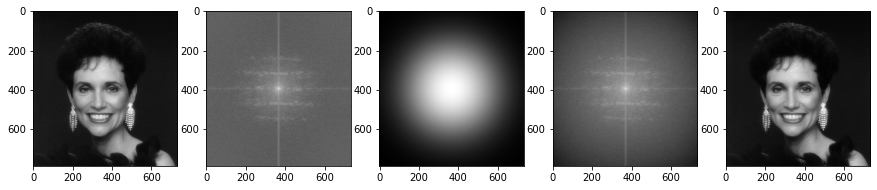

In [6]:
_, axe  = plt.subplots(1, 5, figsize=(15, 8))
axe[0].imshow(img, cmap='gray')
axe[1].imshow(np.log(1 + np.abs(img_fft)), cmap = 'gray')

D0 = 150
H = lpf.GLPF(img, D0)
#H = lpf.ILPF(img, D0)
#H = lpf.BLPF(img, D0, 2) #这里的巴特沃斯滤波器实现效果不佳，并非算法本身原因
#频率域滤波器
axe[2].imshow(np.log(1 + H), cmap = 'gray')
img_result = H * img_fft

axe[3].imshow(np.log(1 + np.abs(img_result)), cmap = 'gray')

img_result = np.fft.ifftshift(img_result)
img_result = np.fft.ifft2(img_result)
img_result = np.real(img_result)
axe[4].imshow(img_result, cmap = 'gray')

## 高通滤波器

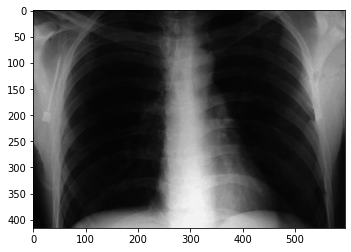

In [7]:
img = cv.imread('./image/Fig0459(a)(orig_chest_xray).tif', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

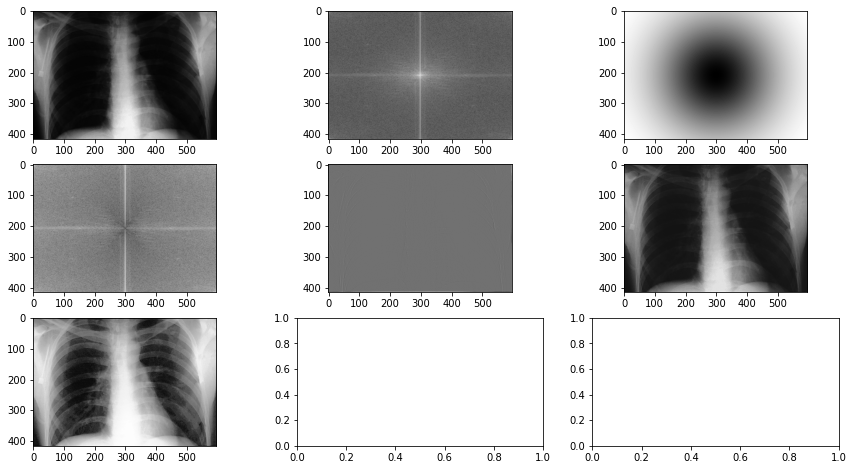

In [8]:
_, axe = plt.subplots(3, 3,figsize = (15, 8))
axe[0, 0].imshow(img, cmap = 'gray')

img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
axe[0 , 1].imshow(np.log(np.abs(img_fft) + 1), cmap = 'gray')

D0 = 150
H = hpf.GHPF(img, D0)
#H = hpf.IHPF(img, D0)
#H = hpf.BHPF(img, D0, 2) #这里的巴特沃斯滤波器实现效果不佳，并非算法本身原因
#频率域滤波器
axe[0, 2].imshow(np.log(1 + H), cmap = 'gray')
img_result = H * img_fft

axe[1, 0].imshow(np.log(1 + np.abs(img_result)), cmap = 'gray')

img_result = np.fft.ifftshift(img_result)
img_result = np.fft.ifft2(img_result)
img_result = np.real(img_result)
axe[1, 1].imshow(img_result, cmap = 'gray')
axe[1, 2].imshow(img_result + img, cmap = 'gray')

img_f = (img_result + img).astype(int)
for i in range(img_f.shape[0]):
    for j in range(img_f.shape[1]):
        if (img_f[i, j] < 0): img_f[i, j] = 0

img_f = hpf.equalize_hist(img_f, hpf.image_hist(img_f))
axe[2, 0].imshow(img_f, cmap = 'gray')
